### Import libraries

In [2]:
%matplotlib inline

# importing pandas and numpy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
from ipyfilechooser import FileChooser


### Import log file

In [3]:
fc = FileChooser()
display(fc)

FileChooser(path='/home/daan/bitofpepper/ai_robot_new/ai_robot/notebooks', filename='', title='', show_hidden=…

In [5]:
# load logfile into a Pandas dataframe
# dit stukje geven
df = pd.read_csv(fc.selected,
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1589 entries, 2018-09-20 15:20:44.204882 to 2018-09-20 15:21:13.590816
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   angle_of_attack  1589 non-null   float64
 1   boat_angle       1589 non-null   float64
 2   boat_heel        1589 non-null   float64
 3   boat_speed       1589 non-null   float64
 4   course_error     1589 non-null   float64
 5   rudder_angle     1589 non-null   float64
 6   target_angle     1589 non-null   float64
 7   wind_direction   1589 non-null   float64
 8   wind_speed       1589 non-null   float64
dtypes: float64(9)
memory usage: 124.1 KB


* angle_of_attack: wind direction relative to the boat
> * A positive angle of attack means the wind is blowing onto the right (starboard) side of the boat
> * A negative angle of attack means the wind is blowing onto the left (port) side of the boat
* boat_angle: compass direction in which the boat is going (North==0/360, East==90, South==180, West==270)
* boat_heel: heeling angle in degrees (rotation around the longitudinal axis).
* boat_speed: speed in knots (5 knots is 9.26 km per hr)
* course_error: difference between boat_angle and target_angle
* rudder_angle: position of the rudder relative to centerline of the boat
* target_angle: compass direction in which you want to go
* wind_direction: direction from where the wind is coming
* wind_speed: wind speed in knots

### Look at a sample of the dataset

In [6]:
# Print the first 5 rows of the dataframe
# YOUR CODE HERE
df.head()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-09-20 15:20:44.204882,-40.236386,359.896901,5.154972,2.099732,130.916042,0.0,228.980859,319.660515,7.963619
2018-09-20 15:20:44.227630,-41.075512,359.799312,4.879416,2.042295,130.818453,0.0,228.980859,318.723800,7.411740
2018-09-20 15:20:44.250254,-40.991465,359.695612,5.185008,2.107305,130.714753,0.0,228.980859,318.704147,7.888204
2018-09-20 15:20:44.274456,-41.605111,359.601871,4.687066,2.002042,130.621012,0.0,228.980859,317.996760,7.045938
2018-09-20 15:20:44.299476,-42.102651,359.508135,4.686779,2.002702,130.527276,0.0,228.980859,317.405484,6.977760


In [7]:
# Print the last 5 rows of the dataframe
# YOUR CODE HERE
df.tail()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-09-20 15:21:13.517707,171.594701,201.197127,3.259223,4.381013,1.290719,0.639840,199.906407,12.791827,22.469809
2018-09-20 15:21:13.535652,171.481091,201.207580,3.325797,4.412032,1.301172,0.645360,199.906407,12.688671,22.626381
2018-09-20 15:21:13.553683,171.474261,201.214410,3.188849,4.268290,1.308002,0.650586,199.906407,12.688671,21.670330
2018-09-20 15:21:13.571725,171.465633,201.223038,3.208308,4.285603,1.316631,0.654001,199.906407,12.688671,21.781511
2018-09-20 15:21:13.590816,171.882186,201.229441,3.122930,4.334720,1.323034,0.658315,199.906407,13.111627,22.285988


In [8]:
# If you want you can look at more rows or try different slices
# YOUR CODE HERE

### Plotting the columns
First we will have a visual look at the data.

In [9]:
# Put the columns in a list named 'columns'
# YOUR CODE HERE
columns = list(df)

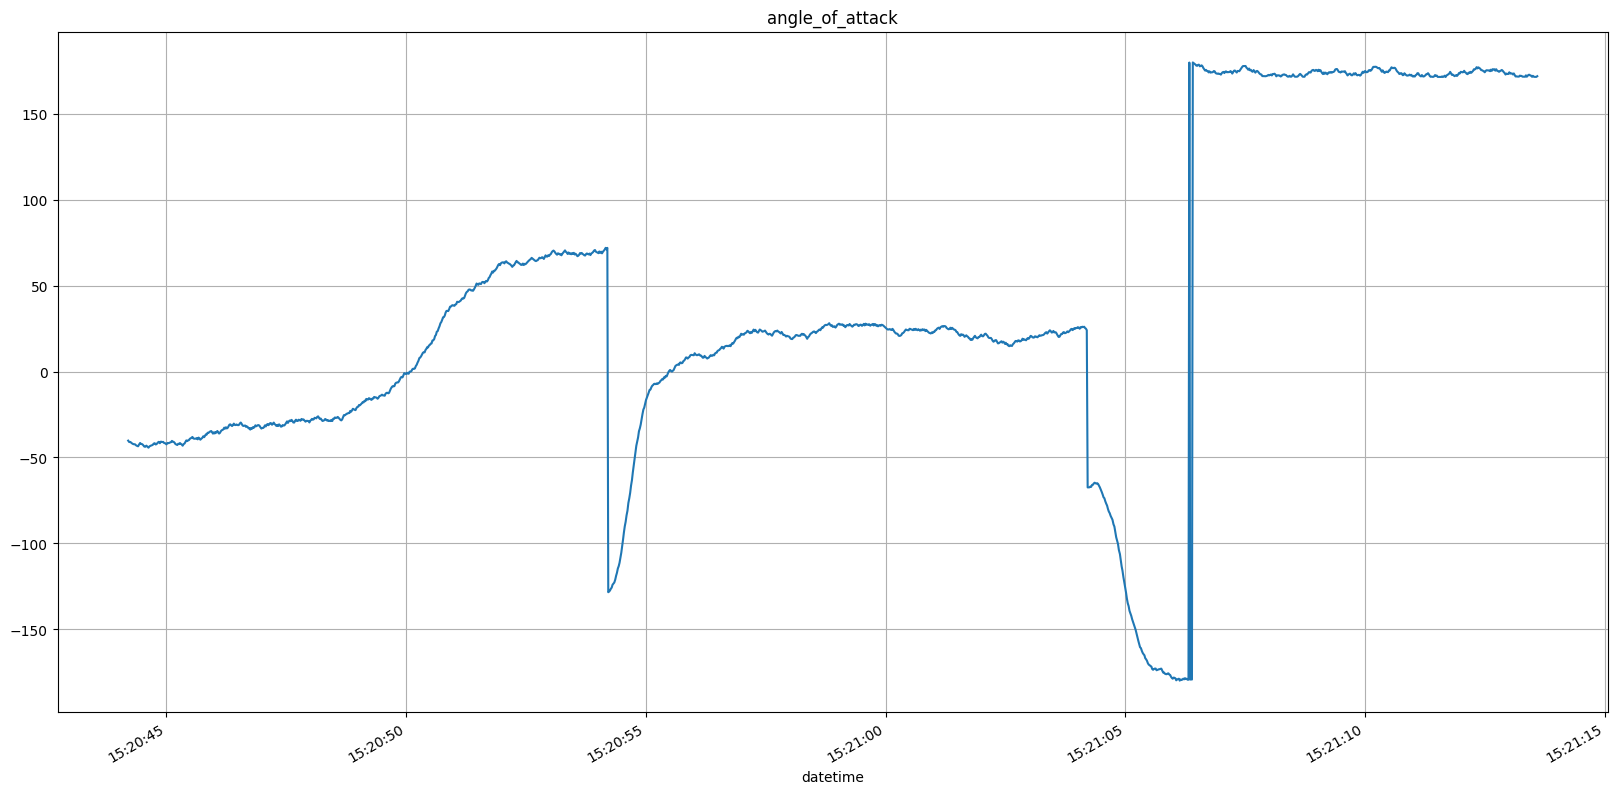

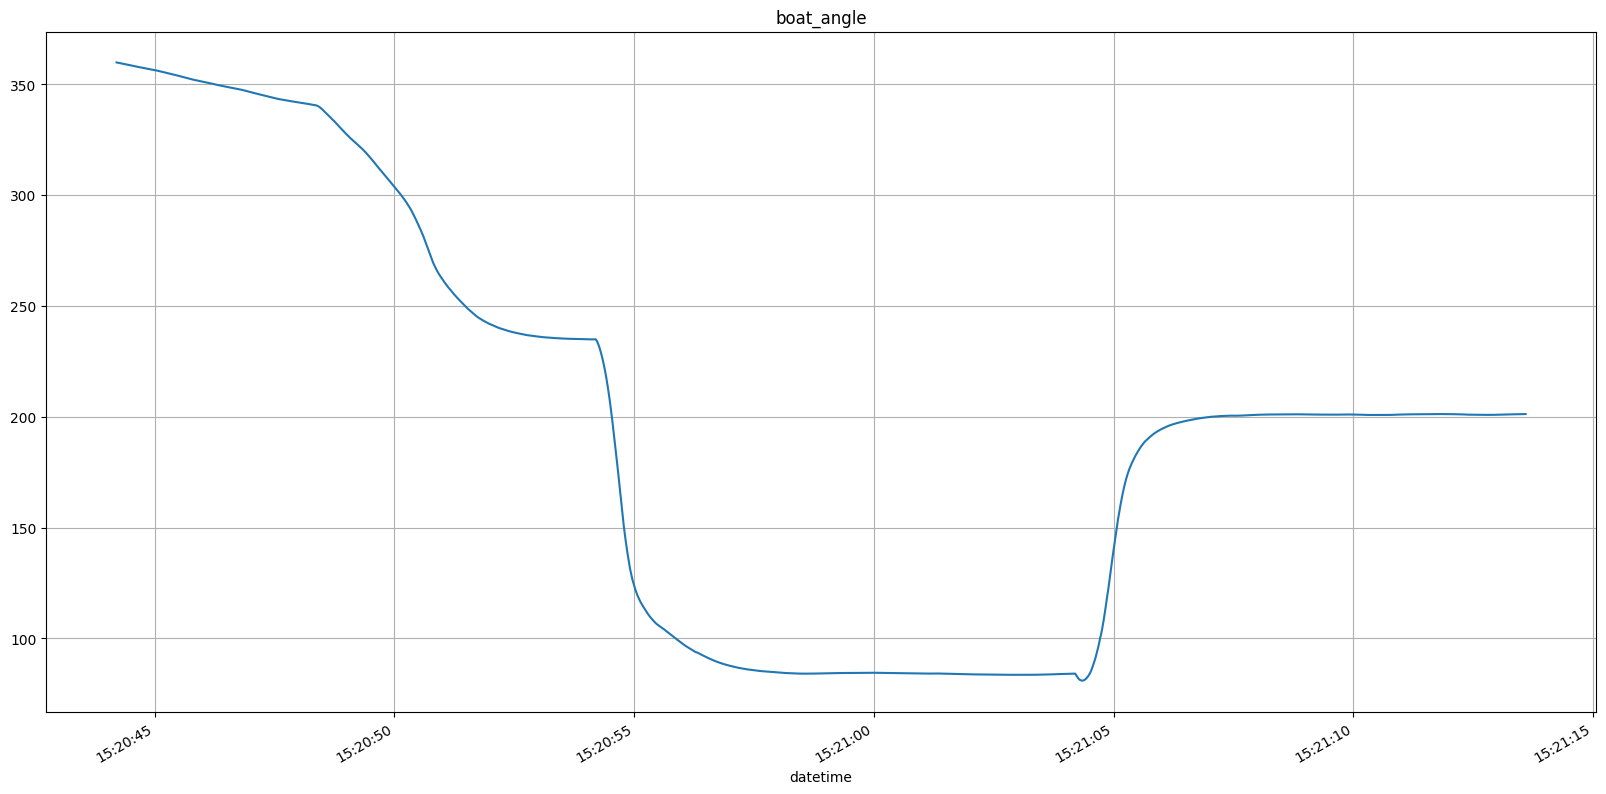

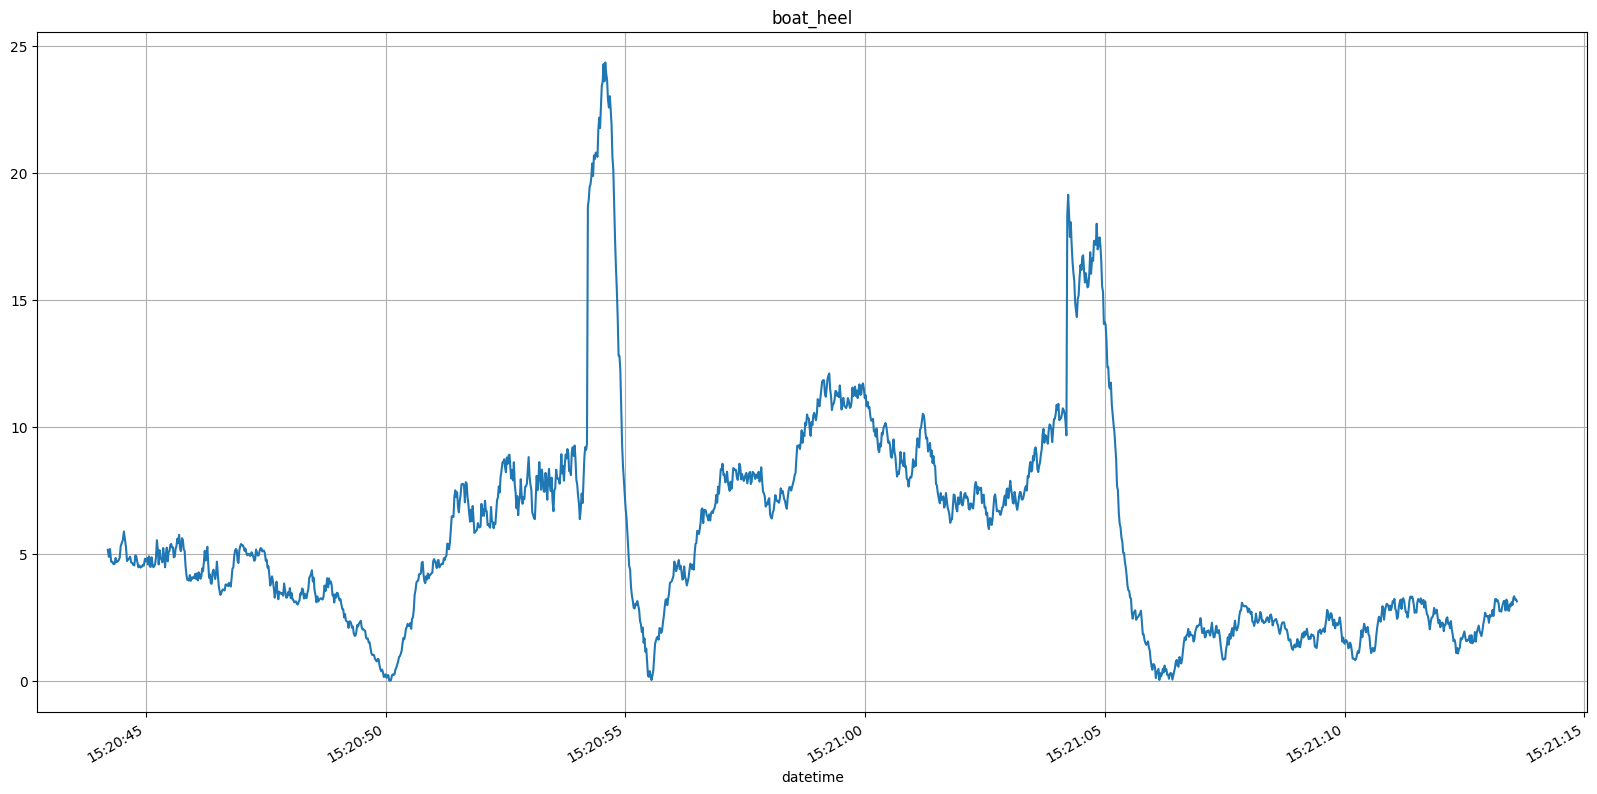

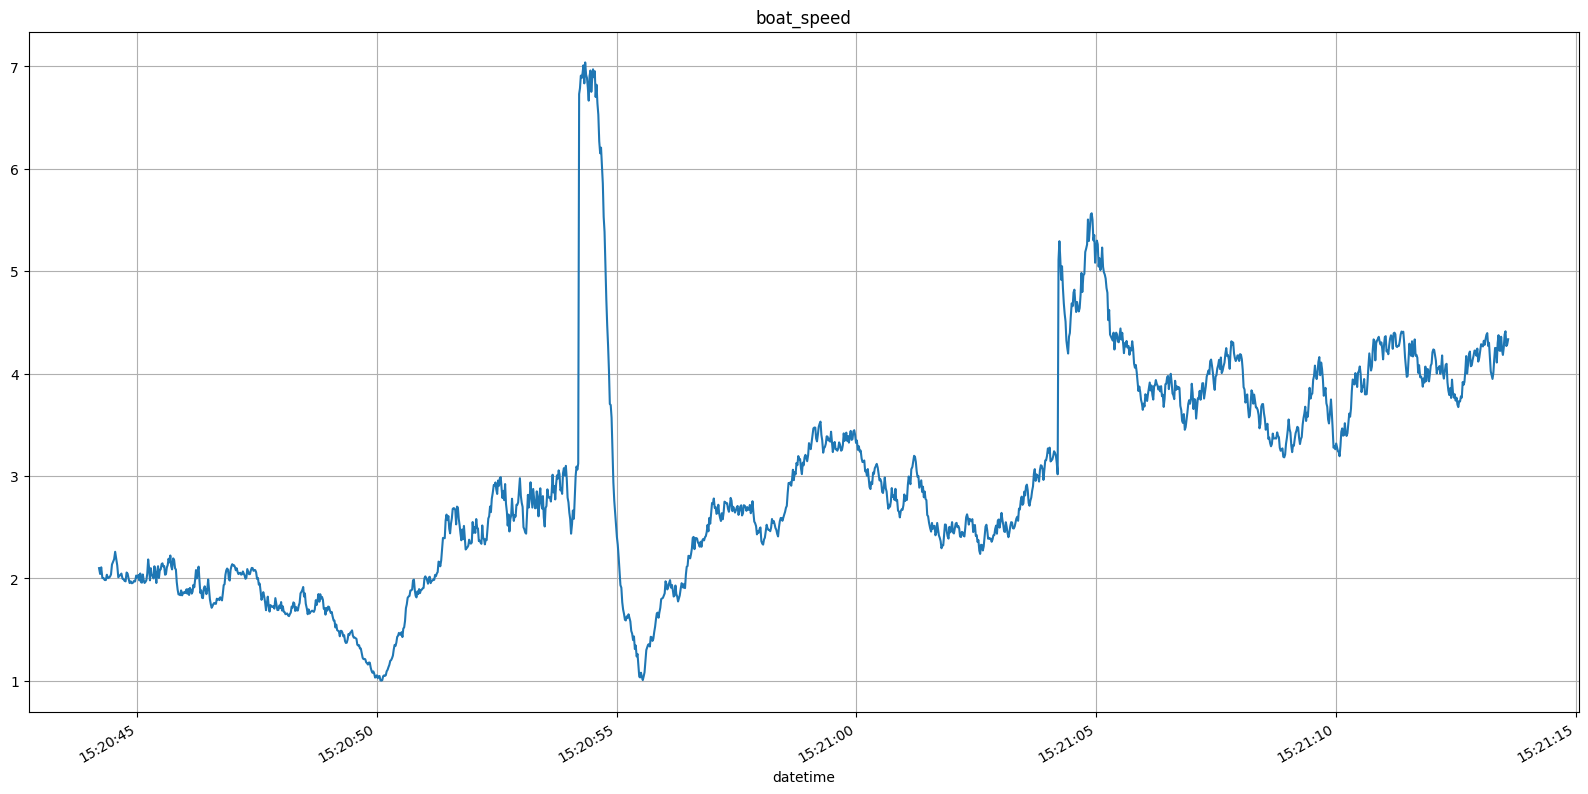

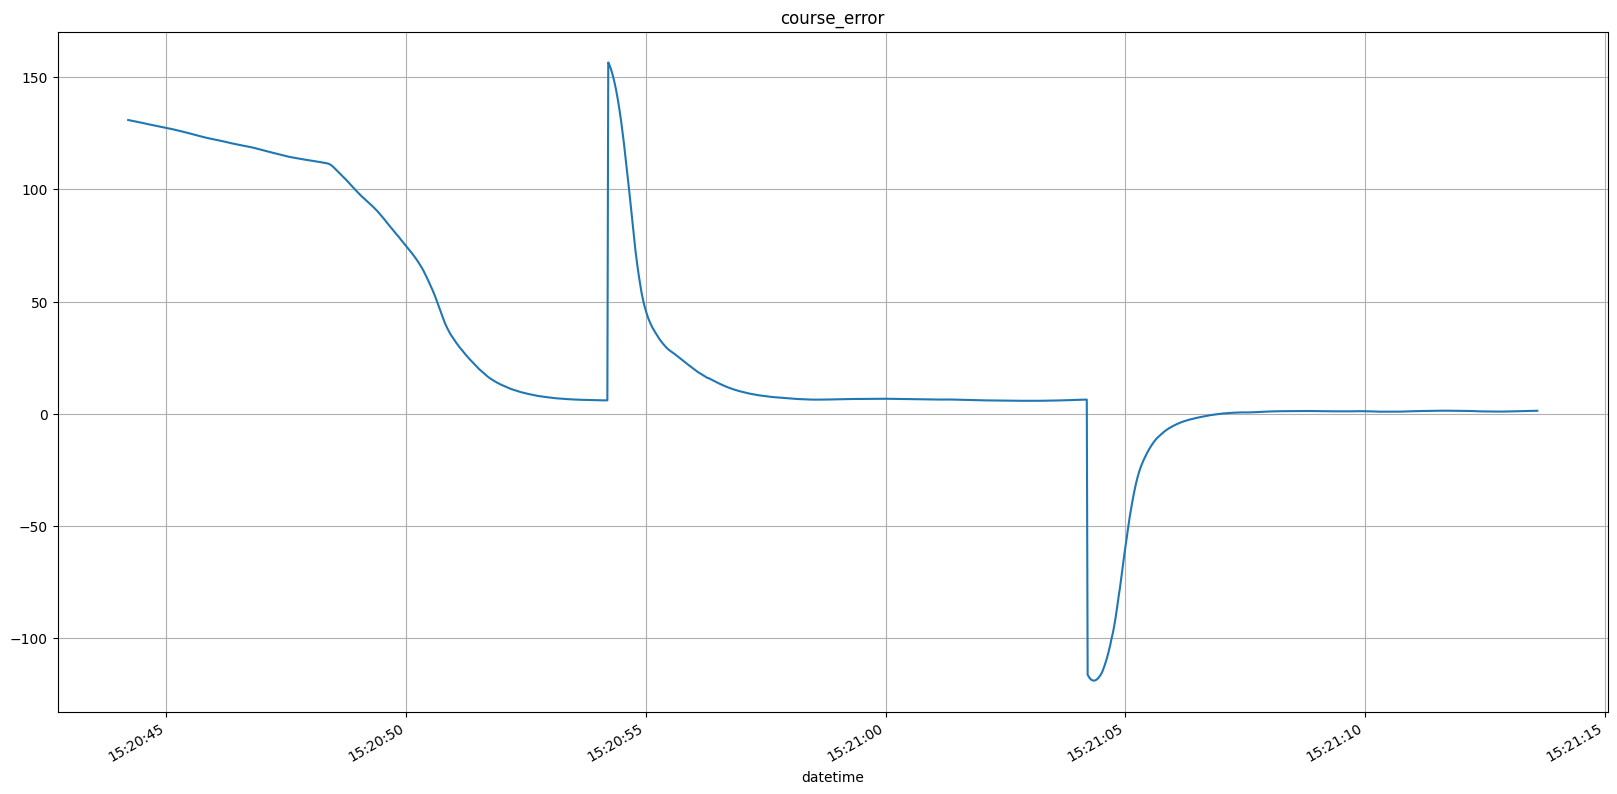

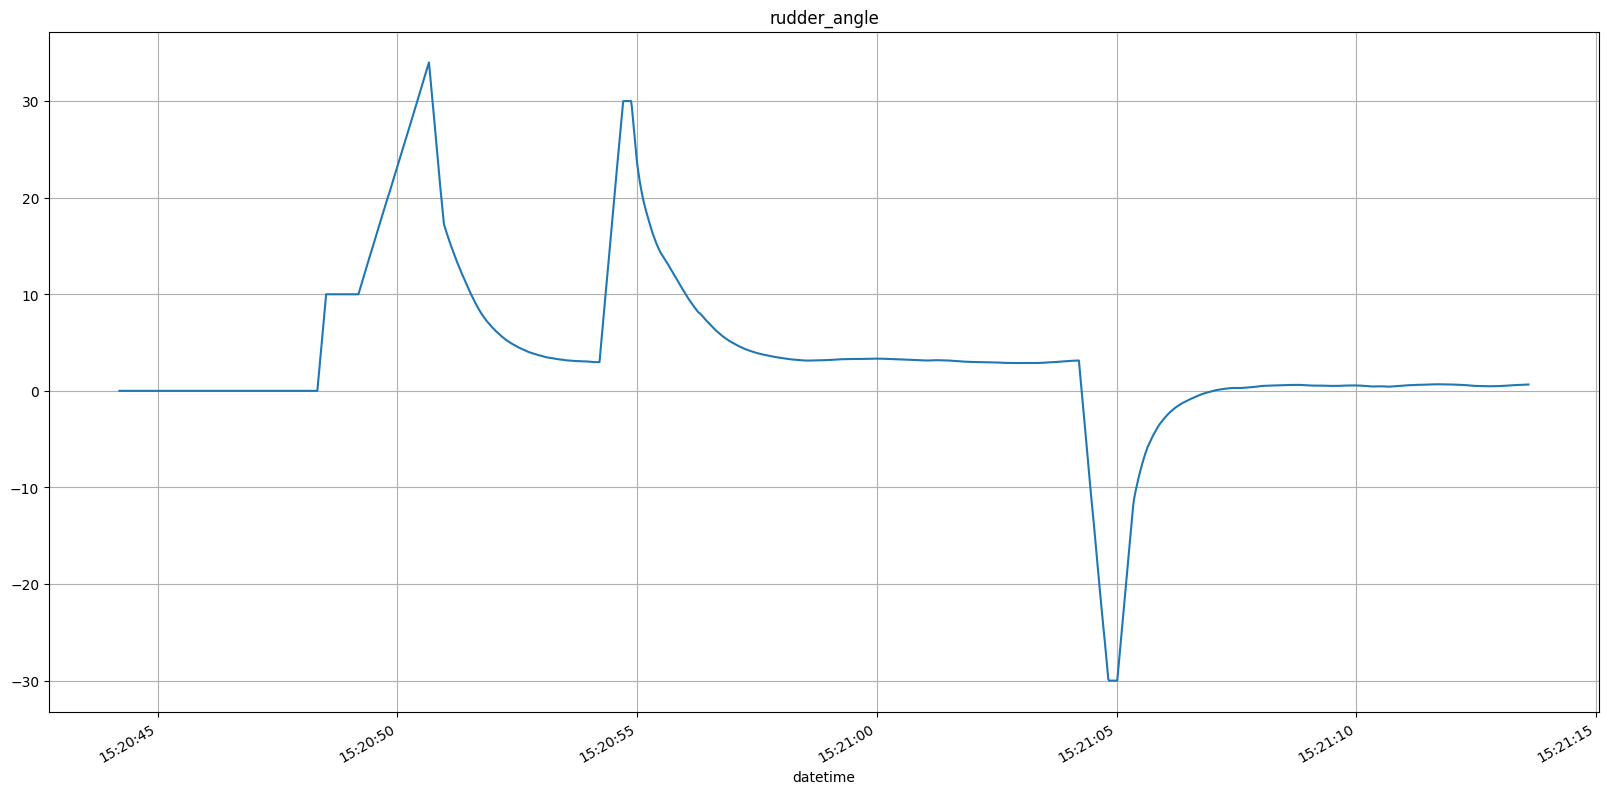

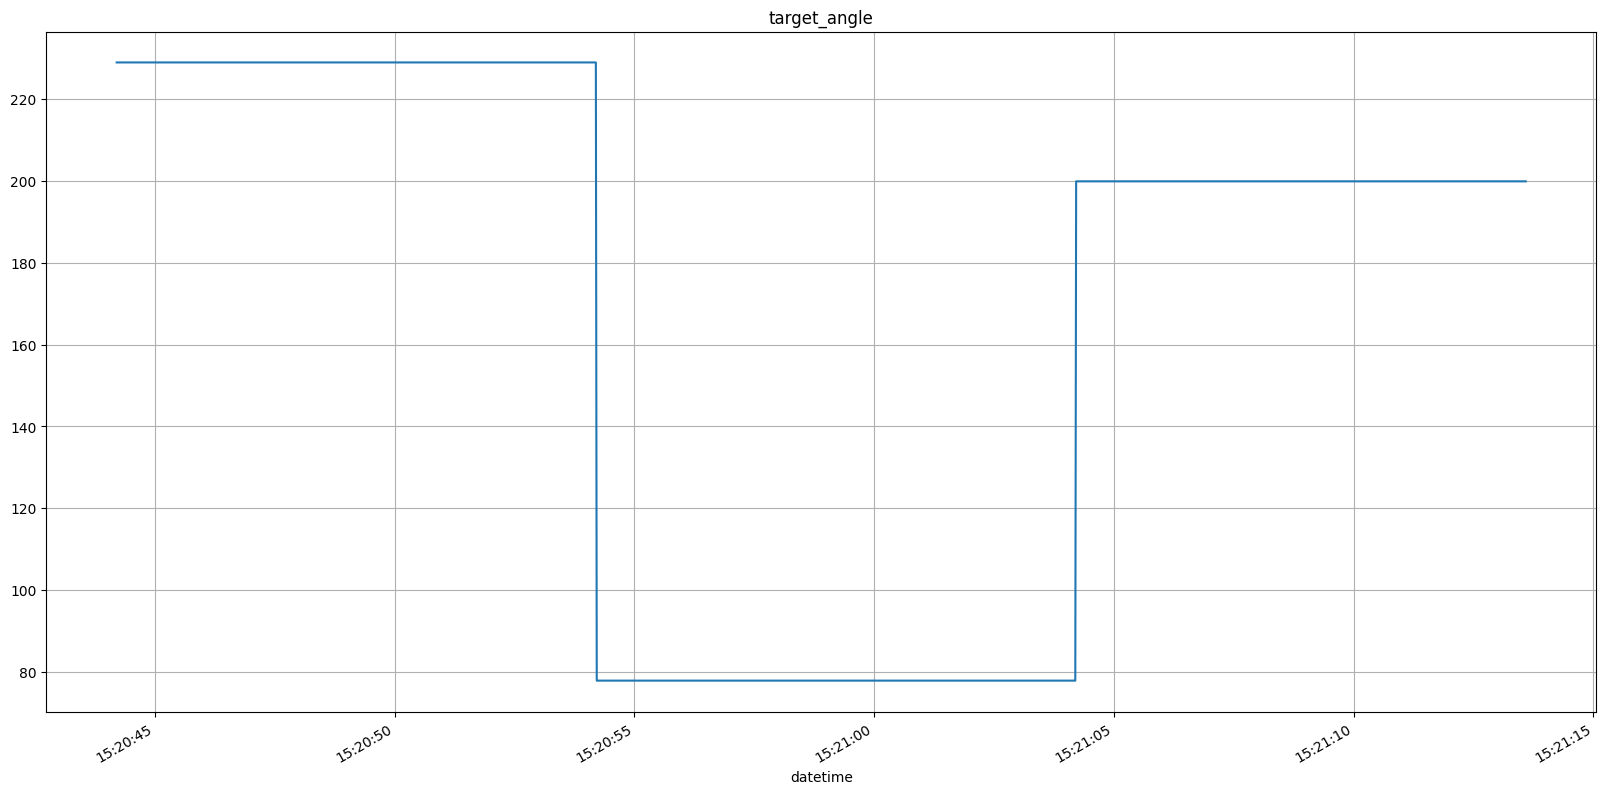

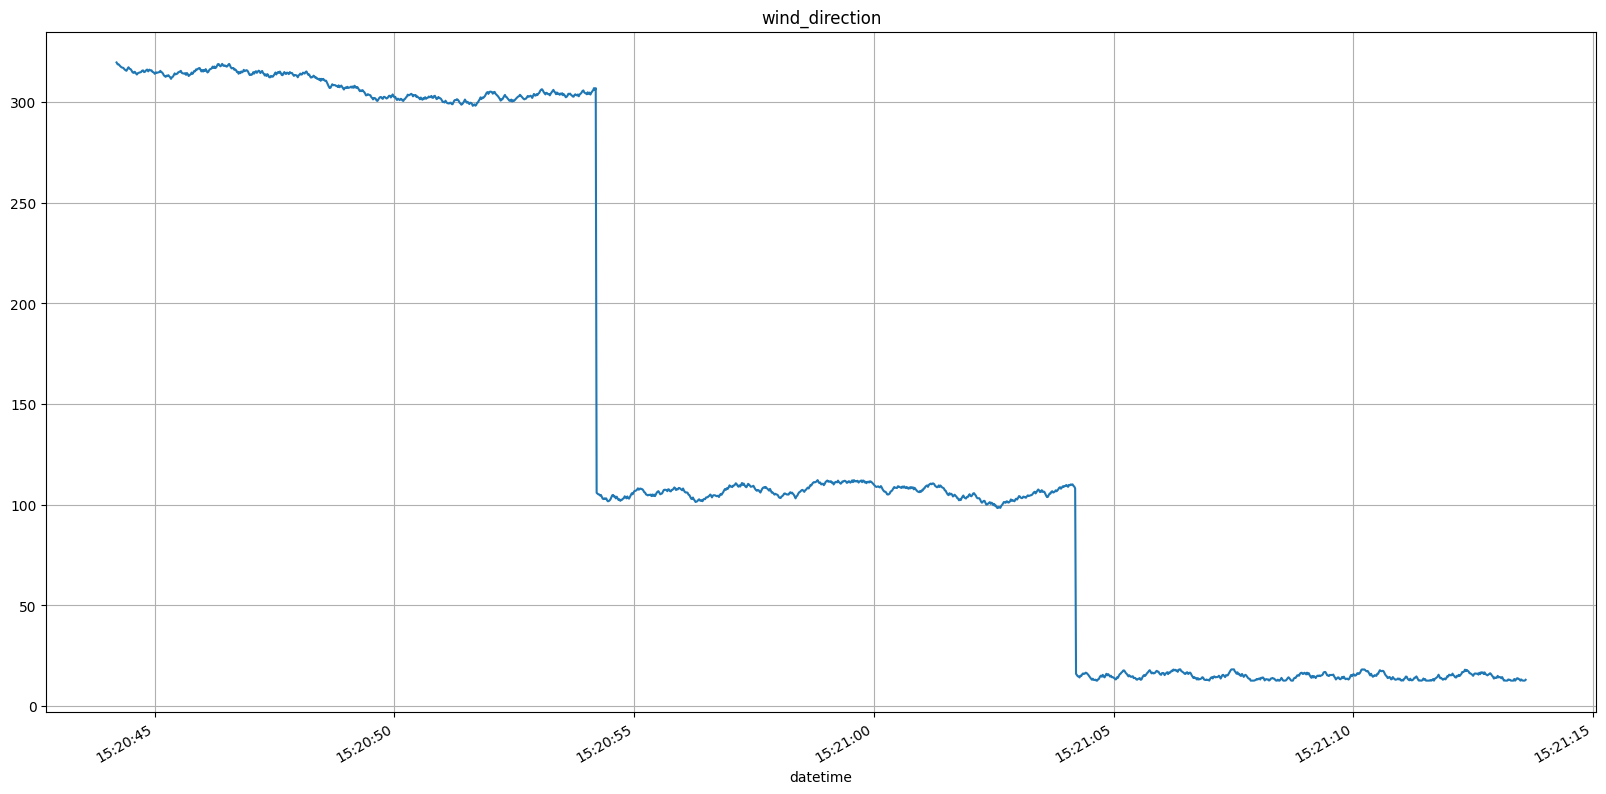

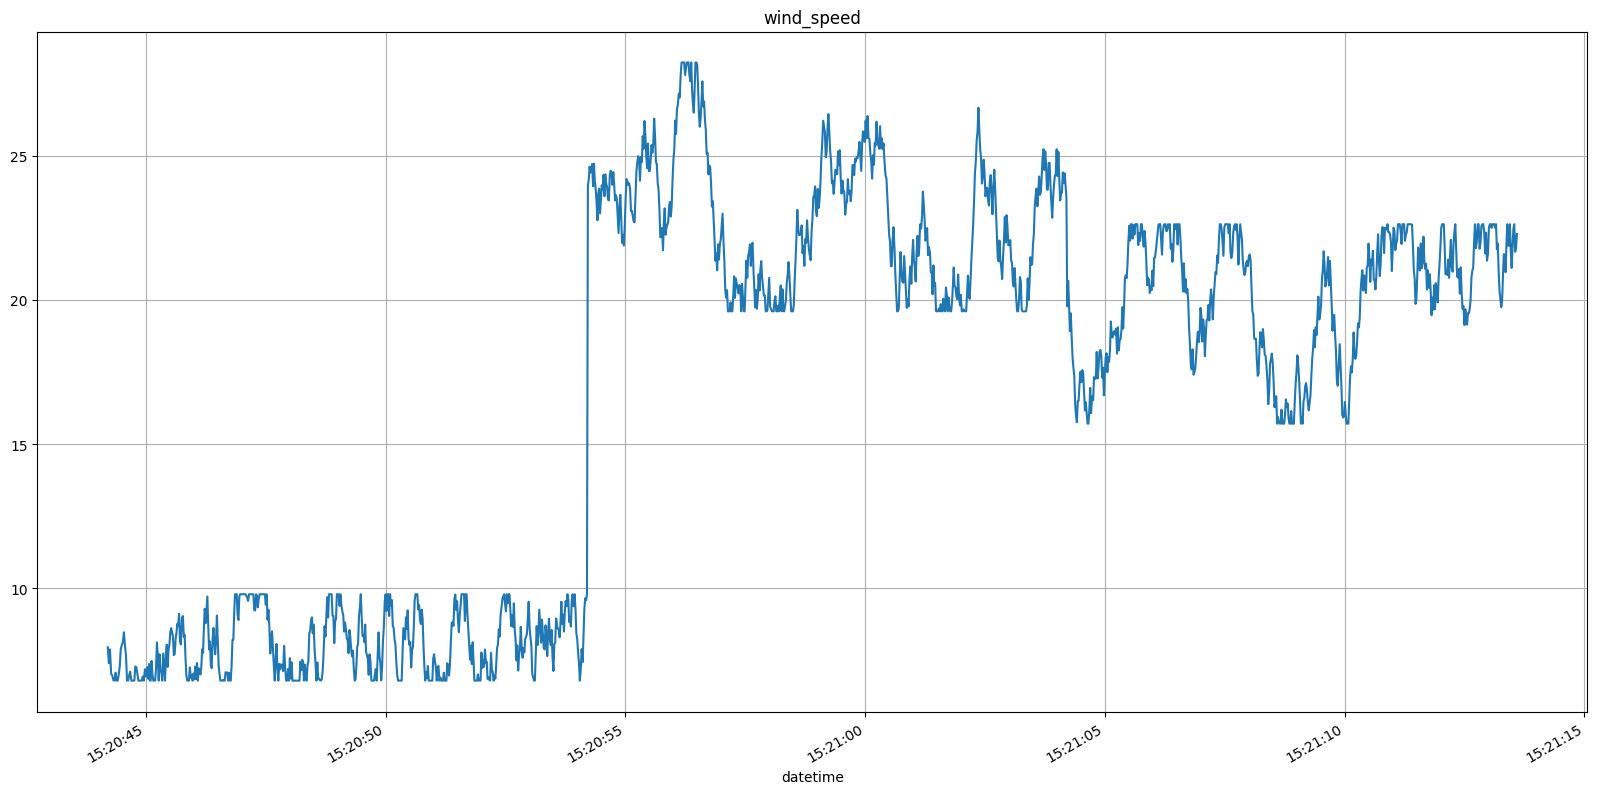

In [10]:
# Plot the data (this can take a few seconds)
# Dit stukje geven
for column in columns:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(column)
    df[column].plot(ax=ax)
    plt.grid(True)

## Zoom in on column rudder_angle (and clip it's maximum value)
Our AI Captain would like to control the rudder angle of the boat. Let's zoom in on this column in the dataset

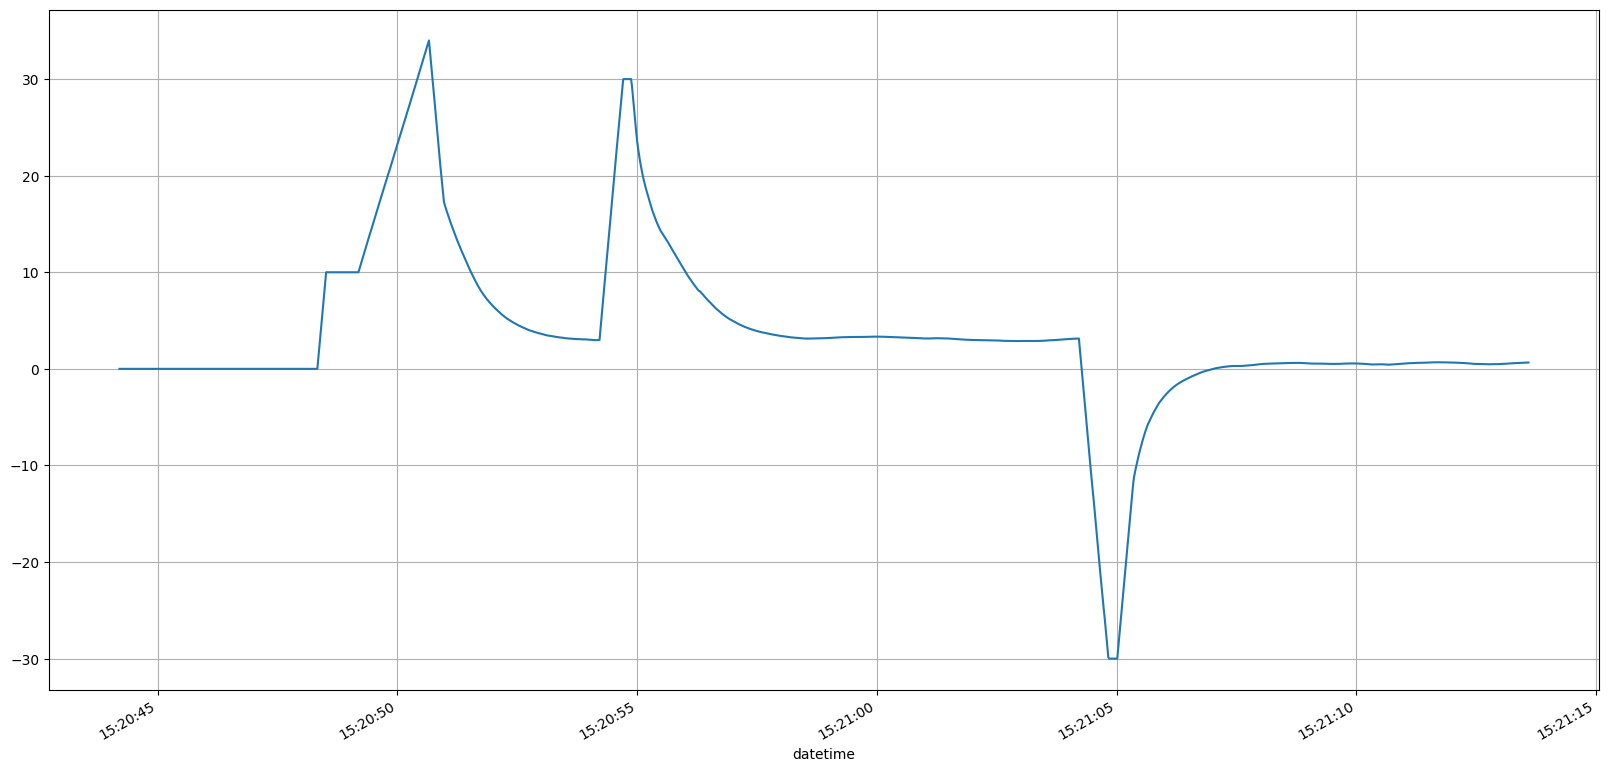

In [11]:
# dit stukje geven
_, ax = plt.subplots(figsize=(20, 10))
df['rudder_angle'].plot(ax=ax)
plt.grid(True)

In [14]:
# Select an interval of 1000 rows (these are 1000 datapoints) and put it in a new dataframe called 'selection'
# YOUR CODE HERE
selection_1k = df.iloc[0:1000]

(1000, 9)

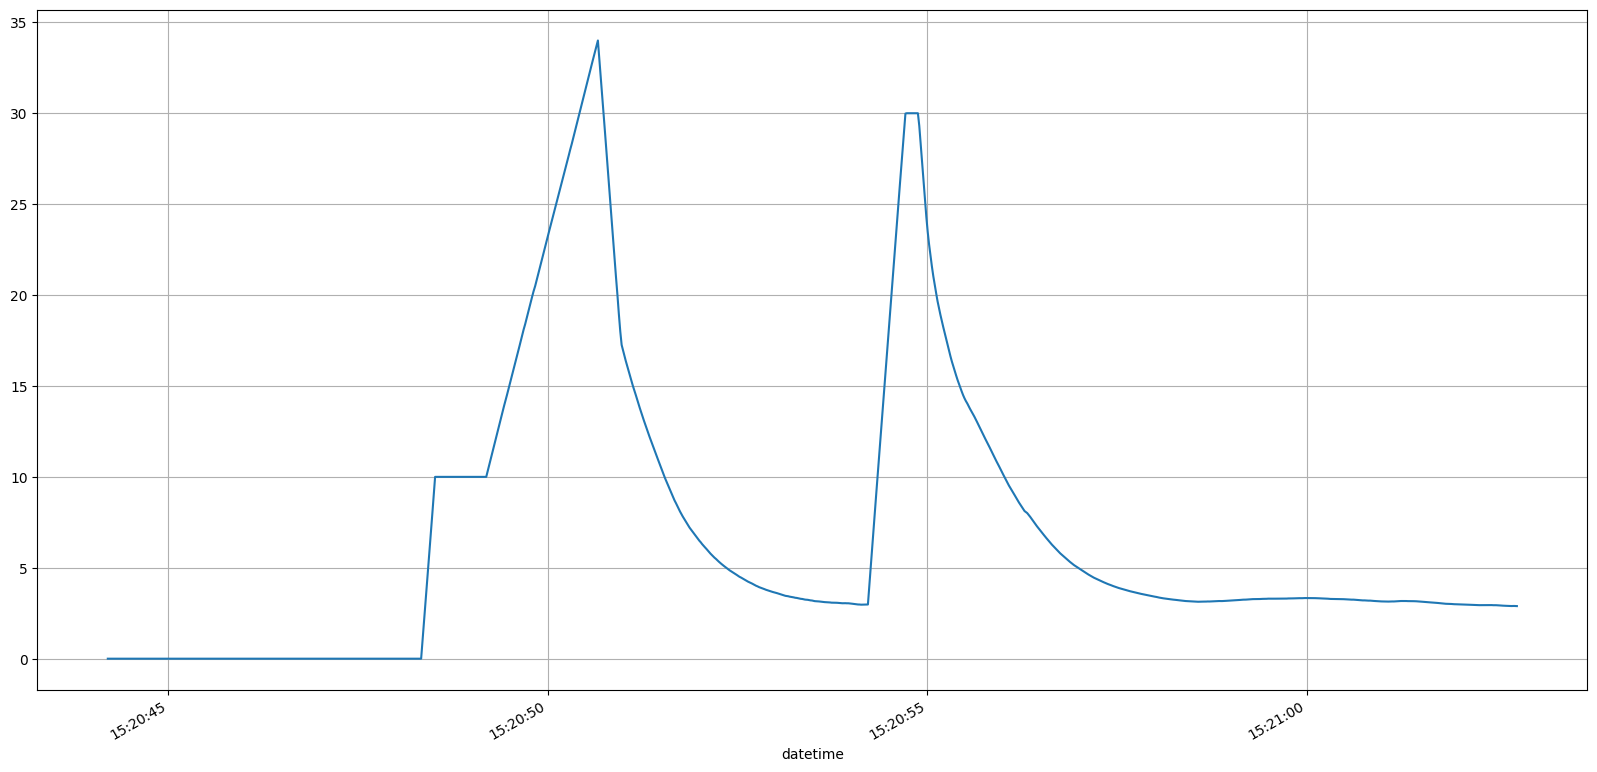

In [13]:
# plot the rudder_angle in your selection
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(20, 10))
selection_1k['rudder_angle'].plot(ax=ax)
plt.grid(True)

In [ ]:
# Try an interval of 10,000 rows now and plot the rudder_angle on this interval
# YOUR CODE HERE
selection_10k = df.iloc[0:10**4]
_, ax = plt.subplots(figsize=(20, 10))
selection_10k['rudder_angle'].plot(ax=ax)
plt.grid(True)

In [ ]:
# Find the maximum and minimum values for rudder_angle in the entire dataset
# YOUR CODE HERE
df.rudder_angle.max(), df.rudder_angle.min()

In [ ]:
# Clip rudder_angle to [-20, 20]; i.e. set angles > 20 to 20 & angles < -20 to -20
# YOUR CODE HERE
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] > 20, 20)
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] < -20, -20)

In [ ]:
# Look at the result of what you just did
_, ax = plt.subplots(figsize=(20, 10))
df[(df.index.hour == 9) & (df.index.minute == 21)]['rudder_angle'].plot(ax=ax)
plt.grid(True)

### Boat_speed (noisy signal)

In [ ]:
# Plot boat_speed of your selection_10k
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(20, 10))
selection_10k['boat_speed'].plot(ax=ax)
plt.grid(True)

In [ ]:
# Plot boat_speed of your selection_10k again, this time with a rolling window calculation with rolling(20)
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(20, 10))
selection_10k['boat_speed'].rolling(20).mean().plot(ax=ax)
plt.grid(True)

### Removing outliers from wind_speed

In [ ]:
# Maybe you noticed that the graph of wind_speed looked quite messy
# Plot the wind_speed for you selection_10k
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(20, 10))
selection_10k['wind_speed'].plot(ax=ax)
plt.grid(True)

In [ ]:
# The big wind_speed values are not realistic. We will define wind_speed's above 35 knots as outliers
# Replace outliers in wind_speed with np.nan (use mask)
# df["wind_speed"] = YOUR CODE HERE
df["wind_speed"] = df["wind_speed"].mask(df["wind_speed"] > 35, np.nan)

In [ ]:
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:1000]['wind_speed'].plot(ax=ax)
plt.grid(True)

### Removing NA's

In [ ]:
# Find the columns that contain NA's
# YOUR CODE HERE
df.isna().sum()

In [ ]:
# Replace the NA's in each column with the last valid observation
# Can you think of a reason why this makes more sense here then replace with mean value?
df['boat_heel'].fillna(method='ffill', inplace=True)
df['target_angle'].fillna(method='ffill', inplace=True)
df['wind_speed'].fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum().sum()
# This should show 0

### Creating a new feature
You can create your own features based on the existing columns.
In sailing VMG is used a lot.
VMG stands for Velocity Made Good and is defined as the the velocity component in the directing where you want to be going.
Maybe this feature will help our machine learning algorithm.

In [ ]:
df['VMG'] = df.boat_speed*np.cos(np.deg2rad(df.course_error))

df = df[['wind_speed', 'wind_direction',
         'angle_of_attack', 'boat_heel',
         'boat_speed', 'VMG',
         'target_angle', 'boat_angle', 'course_error',
         'rudder_angle']]

In [ ]:
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:1000].boat_speed.plot(ax=ax)
df.iloc[0:1000].VMG.plot(ax=ax)
plt.legend()

### Plotting correlation matrix

In [ ]:
# Plot the correlation matrix of the dataframe
# YOUR CODE HERE
corr = df.corr()
corr.style.background_gradient()

In [ ]:
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:1000].plot(ax=ax)
plt.legend()

Notice that the range of the values can differ quite a lot per column

### What did you learn?
In this notebook you have:
* Clipped the values of rudder_angle to [-20, 20]
* Used rolling mean to vizualize boat speed signal
* Replaced outliers in wind_speed
* Replaced NA's in boat_heel and target_angle
* Added a new feature
* Looked at the correlation matrix

In [ ]:
# Save df to pickle
df.to_pickle('data_clean.pkl')